# And1 heatmap

In [1]:
import numpy as np
import pandas as pd
import os, glob
from collections import defaultdict
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

/Library/Python/2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [5]:
def and1(df,p=False):
    '''
    code to calculate and1 opportunities given a data frame.
    The initial filters remove actions that can occur before a foul shot.
    '''
    i = 0
    d = df[(df['type'] != 'sub') & (df['type'] != ' timeout: regular') & (df['type'] != ' timeout: short')\
       ].as_matrix()
    out = []
    shots = df[(df['points'] > 0) & (df['shot_distance']>=0)][[u'original_x', u'original_y']].as_matrix()
    while(i < len(d)-2):
        if 'Free Throw 1 of 1' in d[i+2][37] and (('s.foul' == d[i+1][37]) | ('shooting block foul' == d[i+1][37])) and d[i][-2]>0:
            if (d[i][-1].split()[0] in d[i+2][-1]):
                if p:
                    print d[i][-1].split()[0]
                out.append(d[i][39:41])
                i += 3
            else:
                i += 1
        else:
            i += 1
    return out, shots

In [6]:
t, w = [], []

for csv in glob.glob('2015-16/*.csv'):
    g1 = pd.read_csv('{}'.format(csv))
    if g1['data_set'].unique()[0] != '2015-2016 Regular Season':
        continue
    else:
        try:
            s, ss = and1(g1)
            t.extend(s)
            w.extend(ss)
        except:
            print csv

## Plots

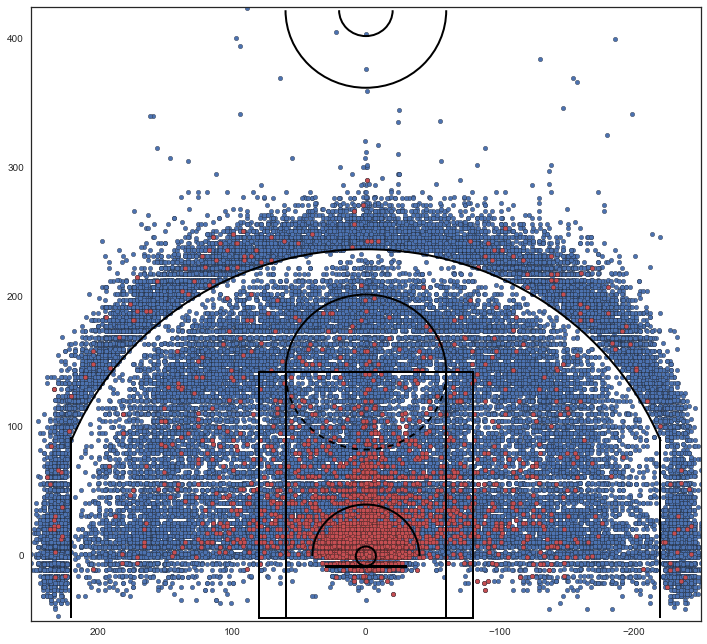

In [11]:
#raw distribution

sns.set_style("white")
sns.set_color_codes()
plt.figure(figsize=(12,11))
plt.scatter([i[0] for i in ww], [i[1] for i in ww])
plt.scatter([i[0] for i in t], [i[1] for i in t], c='r')
draw_court()
# Descending values along the axis from left to right
plt.xlim(250,-250)
plt.ylim(-50,425)
plt.show()

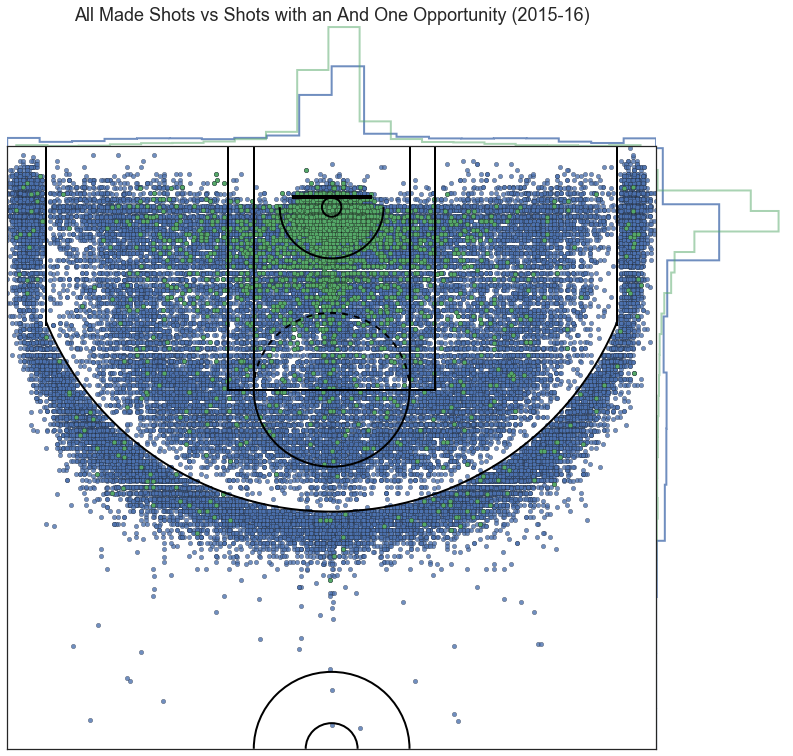

In [91]:
#distribution with axes distributions

joint_shot_chart = sns.JointGrid(
    x = np.array([float(i[0]) for i in ww]),
    y = np.array([float(i[1]) for i in ww]), space=0,
    )

joint_shot_chart = joint_shot_chart.plot_joint(plt.scatter,alpha=0.8)

joint_shot_chart.fig.set_size_inches(12,11)

joint_shot_chart.ax_marg_x.hist(
    np.array([float(i[0]) for i in ww]),
    alpha = 0.8,
    bins=20,
    normed=True,
    histtype = 'step',
    linewidth = 2
    )
joint_shot_chart.ax_marg_y.hist(
    np.array([float(i[1]) for i in ww]),
    alpha = 0.8,
    normed=True,
    bins=20,
    orientation = 'horizontal',
    histtype = 'step',
    linewidth = 2
    )

joint_shot_chart.x = np.array([float(i[0]) for i in t])
joint_shot_chart.y = np.array([float(i[1]) for i in t])

joint_shot_chart = joint_shot_chart.plot_joint(plt.scatter,c='g',alpha=1)
joint_shot_chart.ax_marg_x.hist(
    np.array([float(i[0]) for i in t]),
    alpha = 0.5,
    bins=20,
    normed=True,
    histtype = 'step',
    linewidth = 2
    )
joint_shot_chart.ax_marg_y.hist(
    np.array([float(i[1]) for i in t]),
    alpha = 0.5,
    normed=True,
    bins=20,
    orientation = 'horizontal',
    histtype = 'step',
    linewidth = 2
    )
# A joint plot has 3 Axes, the first one called ax_joint 
# is the one we want to draw our court onto and adjust some other settings
ax = joint_shot_chart.ax_joint
draw_court(ax)

# Adjust the axis limits and orientation of the plot in order
# to plot half court, with the hoop by the top of the plot
ax.set_xlim(-250,250)
ax.set_ylim(422.5, -47.5)

# Get rid of axis labels and tick marks
ax.set_xlabel('')
ax.set_ylabel('')
ax.tick_params(labelbottom='off', labelleft='off')

# Add a title
ax.set_title('All Made Shots vs Shots with an And One Opportunity (2015-16)', 
             y=1.2, fontsize=18)
plt.savefig('AndOnes.png')

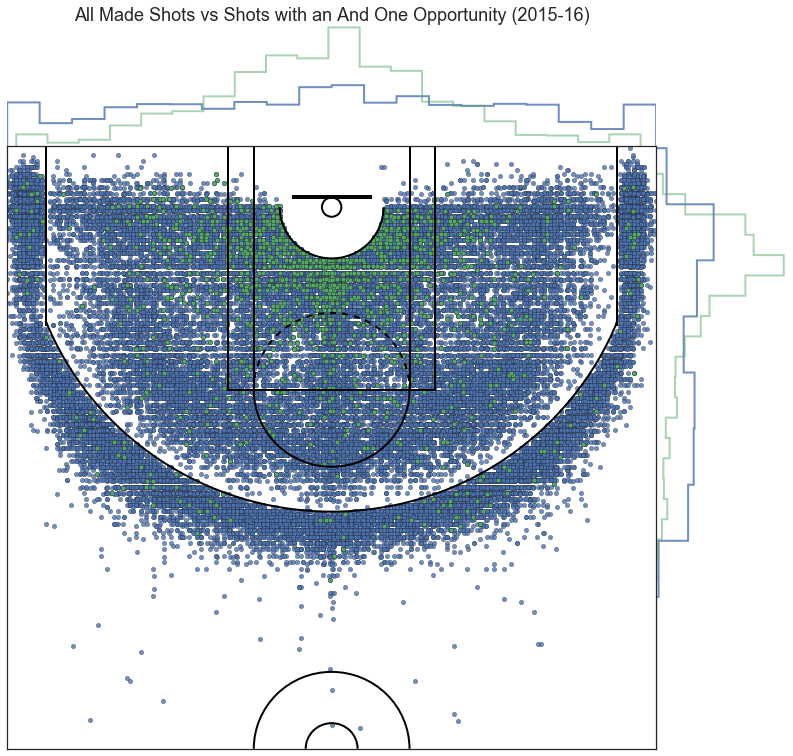

In [92]:
# distribution with restricted area removed

tt = filter(lambda x: np.sqrt(float(x[0])**2+float(x[1])**2) > 40,t)
www = filter(lambda x: np.sqrt(float(x[0])**2+float(x[1])**2) > 40,ww)
cmap=plt.cm.gist_heat_r

joint_shot_chart = sns.JointGrid(
    x = np.array([float(i[0]) for i in www]),
    y = np.array([float(i[1]) for i in www]), space=0,
    )

joint_shot_chart = joint_shot_chart.plot_joint(plt.scatter,alpha=0.8)

joint_shot_chart.fig.set_size_inches(12,11)

joint_shot_chart.ax_marg_x.hist(
    np.array([float(i[0]) for i in www]),
    alpha = 0.8,
    bins=20,
    normed=True,
    histtype = 'step',
    linewidth = 2
    )
joint_shot_chart.ax_marg_y.hist(
    np.array([float(i[1]) for i in www]),
    alpha = 0.8,
    normed=True,
    bins=20,
    orientation = 'horizontal',
    histtype = 'step',
    linewidth = 2
    )

joint_shot_chart.x = np.array([float(i[0]) for i in tt])
joint_shot_chart.y = np.array([float(i[1]) for i in tt])

joint_shot_chart = joint_shot_chart.plot_joint(plt.scatter,c='g',alpha=1)
joint_shot_chart.ax_marg_x.hist(
    np.array([float(i[0]) for i in tt]),
    alpha = 0.5,
    bins=20,
    normed=True,
    histtype = 'step',
    linewidth = 2
    )
joint_shot_chart.ax_marg_y.hist(
    np.array([float(i[1]) for i in tt]),
    alpha = 0.5,
    normed=True,
    bins=20,
    orientation = 'horizontal',
    histtype = 'step',
    linewidth = 2
    )
# A joint plot has 3 Axes, the first one called ax_joint 
# is the one we want to draw our court onto and adjust some other settings
ax = joint_shot_chart.ax_joint
draw_court(ax)

# Adjust the axis limits and orientation of the plot in order
# to plot half court, with the hoop by the top of the plot
ax.set_xlim(-250,250)
ax.set_ylim(422.5, -47.5)

# Get rid of axis labels and tick marks
ax.set_xlabel('')
ax.set_ylabel('')
ax.tick_params(labelbottom='off', labelleft='off')

# Add a title
ax.set_title('All Made Shots vs Shots with an And One Opportunity (2015-16)', 
             y=1.2, fontsize=18)
plt.savefig('AndOnesWithoutRestricted.png')

In [10]:
#draw court taken from http://savvastjortjoglou.com/nba-shot-sharts.html

from matplotlib.patches import Circle, Rectangle, Arc

def draw_court(ax=None, color='black', lw=2, outer_lines=False):
    # If an axes object isn't provided to plot onto, just get current one
    if ax is None:
        ax = plt.gca()

    # Create the various parts of an NBA basketball court

    # Create the basketball hoop
    # Diameter of a hoop is 18" so it has a radius of 9", which is a value
    # 7.5 in our coordinate system
    hoop = Circle((0, 0), radius=7.5, linewidth=lw, color=color, fill=False)

    # Create backboard
    backboard = Rectangle((-30, -7.5), 60, -1, linewidth=lw, color=color)

    # The paint
    # Create the outer box 0f the paint, width=16ft, height=19ft
    outer_box = Rectangle((-80, -47.5), 160, 190, linewidth=lw, color=color,
                          fill=False)
    # Create the inner box of the paint, widt=12ft, height=19ft
    inner_box = Rectangle((-60, -47.5), 120, 190, linewidth=lw, color=color,
                          fill=False)

    # Create free throw top arc
    top_free_throw = Arc((0, 142.5), 120, 120, theta1=0, theta2=180,
                         linewidth=lw, color=color, fill=False)
    # Create free throw bottom arc
    bottom_free_throw = Arc((0, 142.5), 120, 120, theta1=180, theta2=0,
                            linewidth=lw, color=color, linestyle='dashed')
    # Restricted Zone, it is an arc with 4ft radius from center of the hoop
    restricted = Arc((0, 0), 80, 80, theta1=0, theta2=180, linewidth=lw,
                     color=color)

    # Three point line
    # Create the side 3pt lines, they are 14ft long before they begin to arc
    corner_three_a = Rectangle((-220, -47.5), 0, 140, linewidth=lw,
                               color=color)
    corner_three_b = Rectangle((220, -47.5), 0, 140, linewidth=lw, color=color)
    # 3pt arc - center of arc will be the hoop, arc is 23'9" away from hoop
    # I just played around with the theta values until they lined up with the 
    # threes
    three_arc = Arc((0, 0), 475, 475, theta1=22, theta2=158, linewidth=lw,
                    color=color)

    # Center Court
    center_outer_arc = Arc((0, 422.5), 120, 120, theta1=180, theta2=0,
                           linewidth=lw, color=color)
    center_inner_arc = Arc((0, 422.5), 40, 40, theta1=180, theta2=0,
                           linewidth=lw, color=color)

    # List of the court elements to be plotted onto the axes
    court_elements = [hoop, backboard, outer_box, inner_box, top_free_throw,
                      bottom_free_throw, restricted, corner_three_a,
                      corner_three_b, three_arc, center_outer_arc,
                      center_inner_arc]

    if outer_lines:
        # Draw the half court line, baseline and side out bound lines
        outer_lines = Rectangle((-250, -47.5), 500, 470, linewidth=lw,
                                color=color, fill=False)
        court_elements.append(outer_lines)

    # Add the court elements onto the axes
    for element in court_elements:
        ax.add_patch(element)

    return ax